In [168]:
import pandas


df = pandas.read_csv('merged_data.csv', parse_dates=['date'])

data = df.drop(['date'], axis=1)
data.index = df['date']

cols = data.columns


train = data[:int(0.95*(len(data)))]
valid = data[int(0.95*(len(data))):]
train.shape, valid.shape

((576, 2), (31, 2))

In [169]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import math

model = VAR(endog=train)
model_fit = model.fit()


# ndarray = data.to_numpy()



prediction = model_fit.forecast(model_fit.endog, steps=len(valid))

# model_fit.endog

pred = pandas.DataFrame(index=range(0,len(prediction)),columns=cols)
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

rmse = math.sqrt(mean_squared_error(pred['arrivals'], valid['arrivals']))
print(f'rmse for arrivals: {rmse}')



rmse for arrivals: 96.18037756477551


/home/dmitriy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:>

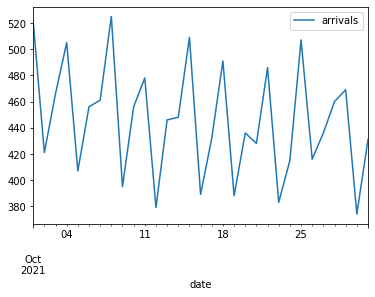

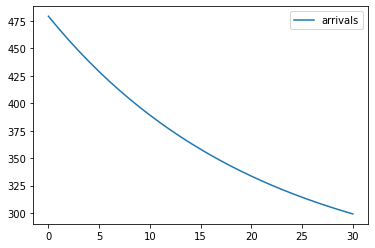

In [172]:
import matplotlib.pyplot as plt

valid.plot(y = 'arrivals')
pred.plot(y = 'arrivals')
